In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

In [3]:
ls wt_rep4/

mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_in_vitro_nucl_array.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt
mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt


In [6]:
load_dir = "wt_rep4"

In [36]:
ARS305_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt")
ARS305_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt")

ARS313_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")
ARS315_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt")

ARS316_wt_rep4_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt")
ARS316_wt_rep4_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt")

In [37]:
#summarise samples
array_dic = {"ARS305_ori": ARS305_wt_rep4_ori, 
             "ARS305_plasmid": ARS305_wt_rep4_plasmid,
             "ARS313_ori": ARS313_wt_rep4_ori,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid,
             "ARS315_ori": ARS315_wt_rep4_ori,
             "ARS315_plasmid": ARS315_wt_rep4_plasmid,
             "ARS316_ori": ARS316_wt_rep4_ori,
             "ARS316_plasmid": ARS316_wt_rep4_plasmid,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS305_ori,1084.0,0.053363,0.066960,0.0,0.011429,0.034286,0.068571,0.405714,175,1084
ARS305_plasmid,4624.0,0.149935,0.202501,0.0,0.000000,0.054054,0.216216,0.864865,37,4624
ARS313_ori,1036.0,0.048885,0.053467,0.0,0.012500,0.032500,0.062500,0.317500,400,1036
ARS313_plasmid,4785.0,0.148383,0.156095,0.0,0.029487,0.098718,0.208974,0.710897,1560,4785
ARS315_ori,1237.0,0.069117,0.080742,0.0,0.014446,0.038523,0.094703,0.451043,623,1237
ARS315_plasmid,4758.0,0.146689,0.197613,0.0,0.015385,0.052564,0.208814,0.858333,1560,4758
ARS316_ori,1240.0,0.052786,0.047699,0.0,0.015504,0.041344,0.075581,0.279070,387,1240
ARS316_plasmid,4785.0,0.154433,0.147075,0.0,0.033974,0.112821,0.233974,0.640385,1560,4785


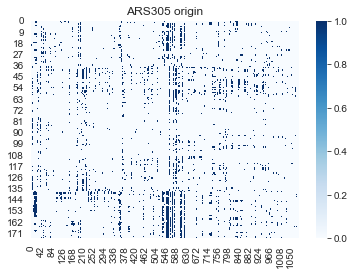

Text(0.5, 1.0, 'ARS305 plasmid')

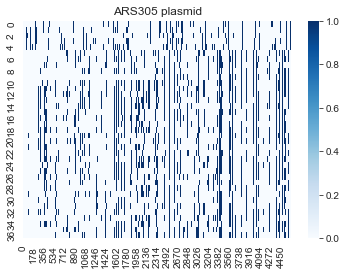

In [41]:
sns.heatmap(ARS305_wt_rep4_ori, cmap="Blues")
plt.title("ARS305 origin")
plt.show()

sns.heatmap(ARS305_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS305 plasmid")

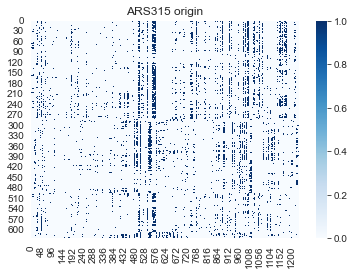

Text(0.5, 1.0, 'ARS315 plasmid')

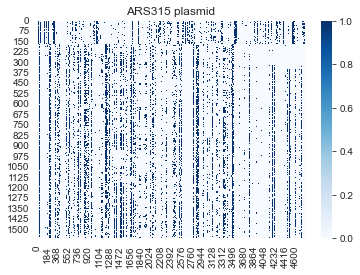

In [39]:
sns.heatmap(ARS315_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS315_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

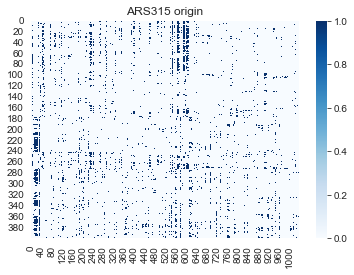

Text(0.5, 1.0, 'ARS315 plasmid')

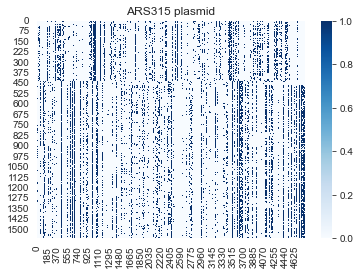

In [42]:
sns.heatmap(ARS313_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS313_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

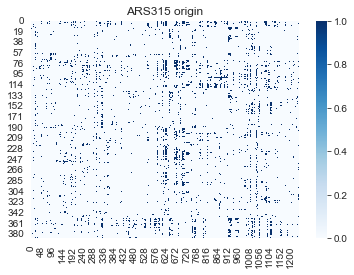

Text(0.5, 1.0, 'ARS315 plasmid')

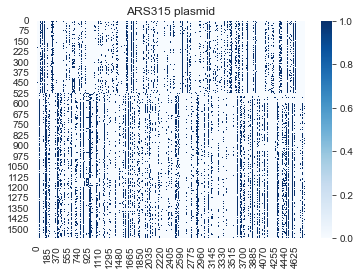

In [43]:
sns.heatmap(ARS316_wt_rep4_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS316_wt_rep4_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

In [35]:
len(list(range(4081,4791)))

ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791].shape

(543,)

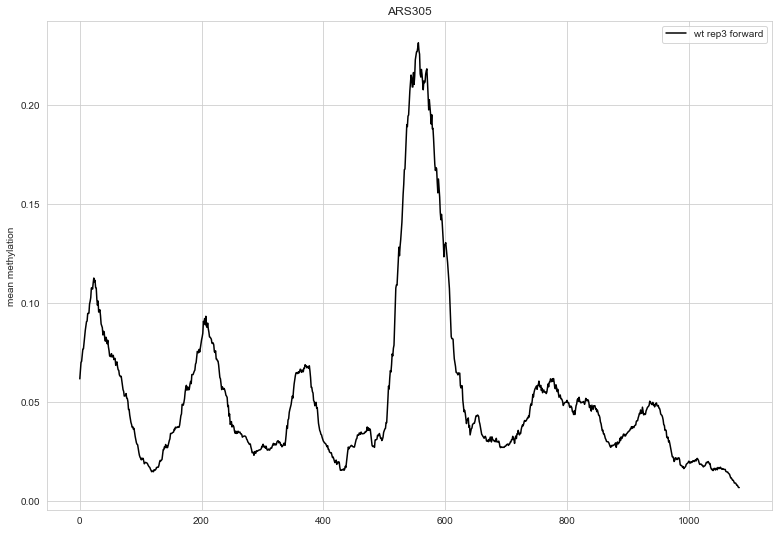

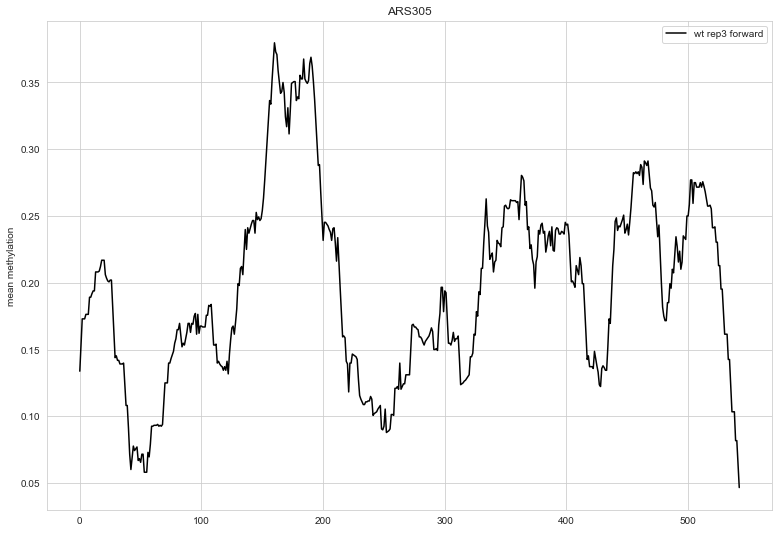

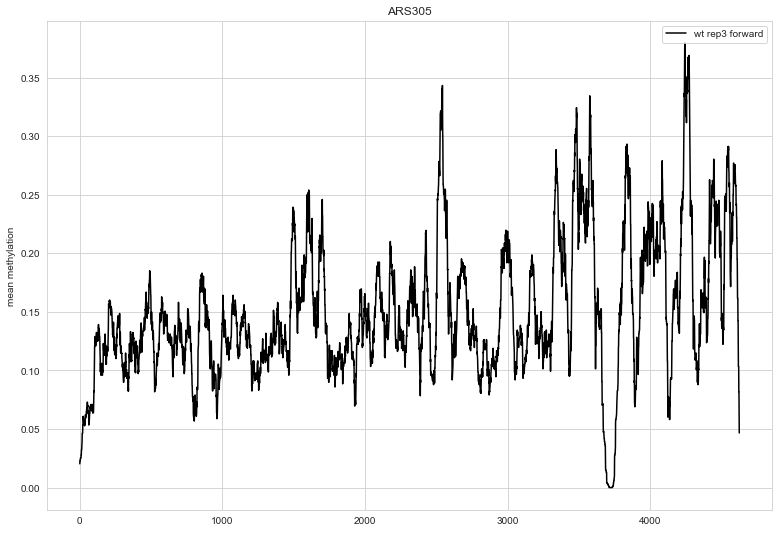

In [45]:
N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1084), y = np.convolve(ARS305_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(543), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(4624), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

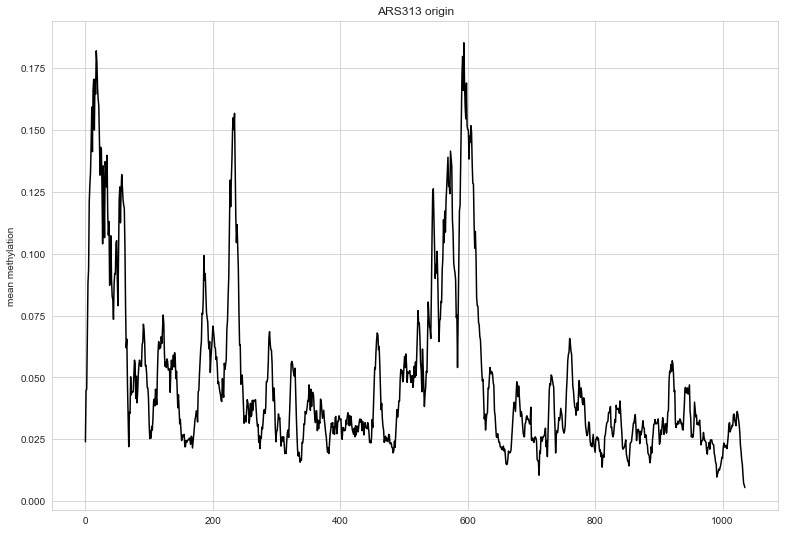

ValueError: All arrays must be of the same length

<Figure size 936x648 with 0 Axes>

In [49]:
N=10

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(ARS313_wt_rep4_ori.shape[1]), y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(669), 
             y = np.convolve(ARS313_wt_rep4_ori.mean(axis=0)[214:894], np.ones(N)/N, mode ="same")
             , color ="black")
sns.lineplot(x = range(669), y = np.convolve(ARS313_wt_rep4_plasmid.mean(axis=0)[:669], np.ones(N)/N, mode ="same")
             , color ="purple")
plt.ylabel("mean methylation")
plt.title("ARS313 plasmid")
plt.show()

In [51]:
len(list(range(214,894)))

680